Міністерство освіти і науки України
Національний технічний університет України
"Київський політехнічний інститут імені Ігоря Сікорського"
Фізико-технічний інститут



                                                ПІДГОТОВКА ТА АНАЛІЗ ДАНИХ
                                                Лабораторна робота № 4
                                                Структури для роботи з великими обсягами даних в Python







                                                                                                             Виконав:
                                                                                                            студент гр. ФБ-24 Берещук Р.Р.


In [247]:

import zipfile
import csv
import pandas as pd
import numpy as np
from datetime import time as dt_time
import time
from datetime import datetime

file = "LAB4.zip"

def extract_zip():
    with zipfile.ZipFile(file, 'r') as zips:
        zips.extractall()  
    print("Успішно розархівовано.")

extract_zip()

def to_csv():
    txt_file = 'household_power_consumption.txt'
    csv_file = 'household_power_consumption.csv'

    with open(txt_file, 'r') as file_in, open(csv_file, 'w', newline='') as file_out:
        reader = csv.reader(file_in, delimiter=';')
        writer = csv.writer(file_out)

        for row in reader:
            writer.writerow(row)
    print(f"Успішно конвертовано {txt_file} у {csv_file}")


def prepare():
    dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }
    na_values = ['?']
    data = "household_power_consumption.txt"
    df = pd.read_csv(data, sep=";", dtype=dtype, na_values=na_values)
    df = df.dropna()
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    data_np = df.to_numpy()
    return df,data_np

def prepare_np(file_path):
    data = []
    with open(file_path, 'r') as file:
        file.readline()
        for line in file:
            line_data = line.strip().split(';')
            if '?' not in line_data:
                converted_line = []
                for index, value in enumerate(line_data):
                    converted_value = float(value.replace(',', '.')) if index >= 2 else value
                    converted_line.append(converted_value)
                if converted_line:
                    data.append(converted_line)
    if data:
        data_np01 = np.array(data)
    else:
        data_np01 = np.array([])  

    return data_np01

df, data_np = prepare()
data_np01 = prepare_np("household_power_consumption.txt")
print(df.head())
print(data_np01[:5])





Успішно розархівовано.
        Date      Time  Global_active_power  Global_reactive_power  Voltage   
0 2006-12-16  17:24:00                4.216                  0.418   234.84  \
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
[['16/12/2006' '17:24:00' '4.216' '0.418' '234.84' '18.4' '0.0' '1.0'
  '17.0']
 [

1. Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.


In [248]:

# dataframe
def powers(df):
    start_time = time.time()
    filtered_df01 = df[df['Global_active_power'] > 5.0]
    end_time = time.time()
    print("Час виконання (dataframe):", end_time - start_time, "секунд")
    print(filtered_df01.head())
    return end_time - start_time

#  numpy
# def powers_np(data_np):
#     start_time = time.time()
#     filtered_np01 = data_np[np.array(data_np[: , 2] > 5.0)]
#     end_time = time.time()
#     print("Час виконання через numpy:", end_time - start_time, "секунд")
#     print(filtered_np01[:5])
#     return end_time - start_time

# # Викличте функції та виміряйте час їх виконання
# time_df = powers(df)
# time_np = powers_np(data_np01)

# time_difference = abs(time_df - time_np)

# if time_df < time_np:
#     print(f"DataFrame швидше за NumPy на {time_difference:.6f} секунд")
# elif time_np < time_df:
#     print(f"NumPy швидше за DataFrame на {time_difference:.6f} секунд")
# else:
#     print("Обидва методи працюють з однаковою швидкістю")



#numpy01
def powers_np(data_np01):
    start_time = time.time()
    filtered_np01 = data_np01[data_np01[:, 2].astype(float) > 5.0]
    end_time = time.time()
    print("Час виконання через numpy:", end_time - start_time, "секунд")
    print(filtered_np01[:5])
    return end_time - start_time

time_df = powers(df)
time_np = powers_np(data_np01)

time_difference = abs(time_df - time_np)

if time_df < time_np:
    print(f"DataFrame швидше за NumPy на {time_difference:.6f} секунд")
elif time_np < time_df:
    print(f"NumPy швидше за DataFrame на {time_difference:.6f} секунд")
else:
    print("Обидва методи працюють з однаковою швидкістю")



Час виконання (dataframe): 0.011968374252319336 секунд
         Date      Time  Global_active_power  Global_reactive_power  Voltage   
1  2006-12-16  17:25:00                5.360                  0.436   233.63  \
2  2006-12-16  17:26:00                5.374                  0.498   233.29   
3  2006-12-16  17:27:00                5.388                  0.502   233.74   
11 2006-12-16  17:35:00                5.412                  0.470   232.78   
12 2006-12-16  17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  
Час виконання через numpy: 1.559829235

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [249]:

def voltage(df):
    start_time = time.time()
    filtered_df02 = df[df['Voltage'] > 235]
    end_time = time.time()
    print("Час виконання (dataframe):", end_time - start_time, "секунд")
    print(filtered_df02.head())
    return end_time - start_time

# numpy
# def voltage_np(data_np):
#     start_time = time.time()
#     filtered_np02 = data_np[np.array(data_np[:, 4] > 235)]
#     end_time = time.time()
#     print("Час виконання через NumPy:", end_time - start_time, "секунд")
#     print(filtered_np02[:5])
#     return end_time - start_time
# time_df_voltage = voltage(df)
# time_np_voltage = voltage_np(data_np)

# numpy01
def voltage_np(data_np01):
    start_time = time.time()
    filtered_np02 = data_np01[data_np01[:, 4].astype(float) > 235]
    end_time = time.time()
    print("Час виконання через NumPy:", end_time - start_time, "секунд")
    print(filtered_np02[:5])
    return end_time - start_time
time_df_voltage = voltage(df)
time_np_voltage = voltage_np(data_np01)



time_difference = abs(time_df_voltage - time_np_voltage)

if time_df_voltage < time_np_voltage:
    print(f"DataFrame швидше за NumPy на {time_difference:.6f} секунд")
elif time_np_voltage < time_df_voltage:
    print(f"NumPy швидше за DataFrame на {time_difference:.6f} секунд")
else:
    print("Обидва методи працюють з однаковою швидкістю")


Час виконання (dataframe): 0.11568713188171387 секунд
         Date      Time  Global_active_power  Global_reactive_power  Voltage   
4  2006-12-16  17:28:00                3.666                  0.528   235.68  \
5  2006-12-16  17:29:00                3.520                  0.522   235.02   
6  2006-12-16  17:30:00                3.702                  0.520   235.09   
7  2006-12-16  17:31:00                3.700                  0.520   235.22   
14 2006-12-16  17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  
Час виконання через NumPy: 2.1592257022

3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [250]:
def amperage(df):
    start_time = time.time()
    filtered_df03 = df[df['Global_intensity'].between(19, 20) & (df['Sub_metering_2'] > df['Sub_metering_3'])]
    end_time = time.time()
    print("Час виконання (DataFrame):", end_time - start_time, "секунд")
    print(filtered_df03.head())
    return end_time - start_time, filtered_df03

# numpy
# def amperage_np(data_np):
#     start_time = time.time() 
#     filtered_np03 = data_np[(data_np[:, 5] >= 19) & (data_np[:, 5] <= 20) & (data_np[:, 7] > data_np[:, 8])]
#     end_time = time.time()
#     print("Час виконання (NumPy):", end_time - start_time, "секунд")
#     print(filtered_np03[:5])
#     return end_time - start_time, filtered_np03

# numpy01
def amperage_np(data_np01):
    start_time = time.time() 
    filtered_np03 = data_np01[(data_np01[:, 5].astype(float) >= 19) & (data_np01[:, 5].astype(float) <= 20) & (data_np01[:, 7].astype(float) > data_np01[:, 8].astype(float))]
    end_time = time.time()
    print("Час виконання (NumPy):", end_time - start_time, "секунд")
    print(filtered_np03[:5])
    return end_time - start_time, filtered_np03

time_df_amperage, filtered_df03 = amperage(df)
time_np_amperage, filtered_np03 = amperage_np(data_np01)

time_difference = abs(time_df_amperage - time_np_amperage)

if time_df_amperage < time_np_amperage:
    print(f"DataFrame швидше за NumPy на {time_difference:.6f} секунд")
elif time_np_amperage < time_df_amperage:
    print(f"NumPy швидше за DataFrame на {time_difference:.6f} секунд")
else:
    print("Обидва методи працюють з однаковою швидкістю")


Час виконання (DataFrame): 0.018947124481201172 секунд
          Date      Time  Global_active_power  Global_reactive_power  Voltage   
45  2006-12-16  18:09:00                4.464                  0.136   234.66  \
460 2006-12-17  01:04:00                4.582                  0.258   238.08   
464 2006-12-17  01:08:00                4.618                  0.104   239.61   
475 2006-12-17  01:19:00                4.636                  0.140   237.37   
476 2006-12-17  01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  
Час виконання (NumPy): 5.5

4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії

In [251]:
def random_sample(df):
    start_time = time.time()
    random_df = df.sample(n=500000, replace=False)
    averages_df = random_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    end_time = time.time()
    print("Час виконання random_sample:", end_time - start_time, "секунд")
    print("Результат random_sample:", averages_df)
    return end_time - start_time

# numpy
# def random_sample_np(data_np):
#     start_time = time.time()
#     random_np = data_np[np.random.choice(data_np.shape[0], size=500000, replace=False), :]
#     averages_np = np.mean(random_np [:, 6:9], axis=0)
#     end_time = time.time()
#     print("Час виконання random_sample_np:", end_time - start_time, "секунд")
#     print("Результат random_sample_np:", averages_np)
#     return end_time - start_time



# numpy01
def random_sample_np(data_np01):
    start_time = time.time()
    
    random_indices = np.random.choice(data_np01.shape[0], size=500000, replace=False)
    random_np = data_np01[random_indices, :]
    
    random_np[:, 6:9] = random_np[:, 6:9].astype(float)
    
    # Перевірка, чи можна перетворити значення у числа
    # non_numeric_values = []
    # for row in random_np[:, 6:9]:
    #     for value in row:
    #         try:
    #             float(value)
    #         except ValueError:
    #             non_numeric_values.append(value)
    
    # if non_numeric_values:
    #     print("Значення, які не вдаються перетворити у числовий тип:")
    #     print(non_numeric_values)
    
    averages_np01 = np.mean(random_np[:, 6:9].astype(float), axis=0)
    
    end_time = time.time()
    print("Час виконання numpy:", end_time - start_time, "секунд")
    print("Результат numpy:", averages_np01)
    return end_time - start_time

time_random_df = random_sample(df)
time_random_np = random_sample_np(data_np01)




time_difference = abs(time_random_df - time_random_np)

if time_random_df < time_random_np:
    print(f"DataFrame швидше за NumPy на {time_difference:.6f} секунд")
elif time_random_np < time_random_df:
    print(f"NumPy швидше за DataFrame на {time_difference:.6f} секунд")
else:
    print("Обидва методи працюють з однаковою швидкістю")


Час виконання random_sample: 0.23537039756774902 секунд
Результат random_sample: Sub_metering_1    1.119582
Sub_metering_2    1.299552
Sub_metering_3    6.462616
dtype: float64
Час виконання numpy: 2.902857542037964 секунд
Результат numpy: [1.115806 1.308388 6.461208]
DataFrame швидше за NumPy на 2.667487 секунд


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [252]:
from datetime import datetime

def last_df(df):
    df['Time'] = df['Time'].astype(str)
    filtered_df05 = df[
        (df['Time'] > '18:00:00') &
        (df['Global_active_power'] > 6) &
        (df['Sub_metering_2'] > df['Sub_metering_1']) &
        (df['Sub_metering_2'] > df['Sub_metering_3'])
    ]
    result_df = pd.concat([filtered_df05.iloc[:len(filtered_df05) // 2:3], filtered_df05.iloc[len(filtered_df05) // 2::4]])
    print(result_df.head(5))
    return result_df


# numpy    
# def last_np(data_np):
#     # Фільтруємо за часом після 18:00
#     after_18 = time_objects > datetime.strptime('18:00:00', '%H:%M:%S').time()
#     selected_time_power = data_np[after_18]
#     # Фільтрація за великою потужністю
#     high_power = selected_time_power[selected_time_power[:, 2].astype(float) > 6]
#     # Додаткова фільтрація за субметрами
#     filtered_np05 = high_power[(high_power[:, 7].astype(float) > high_power[:, 6].astype(float)) &
#                                (high_power[:, 7].astype(float) > high_power[:, 8].astype(float))]
#     res_np = np.concatenate([filtered_np05[:len(filtered_np05) // 2:3], filtered_np05[len(filtered_np05) // 2::4]])
#     print(res_np)
#     return res_np 

  
# numpy01
time_objects = np.array([datetime.strptime(time_str, '%H:%M:%S').time() for time_str in data_np01[:, 1]])

def last_np(data_np01):

    after_18 = time_objects > datetime.strptime('18:00:00', '%H:%M:%S').time()
    selected_time_power = data_np01[after_18]
    
    high_power = selected_time_power[selected_time_power[:, 2].astype(float) > 6]

    filtered_np05 = high_power[(high_power[:, 7].astype(float) > high_power[:, 6].astype(float)) &
                               (high_power[:, 7].astype(float) > high_power[:, 8].astype(float))]

    res_np = np.concatenate([filtered_np05[:len(filtered_np05) // 2:3], filtered_np05[len(filtered_np05) // 2::4]])
    
    print(res_np[:5])
    return res_np


start_time_df = time.time()
last_df(df)
end_time_df = time.time()

start_time_np = time.time()
last_np(data_np01)
end_time_np = time.time()

time_difference_df = end_time_df - start_time_df
time_difference_np = end_time_np - start_time_np

if time_difference_df < time_difference_np:
    print(f"DataFrame швидше за NumPy на {abs(time_difference_df - time_difference_np):.6f} секунд")
elif time_difference_np < time_difference_df:
    print(f"NumPy швидше за DataFrame на {abs(time_difference_df - time_difference_np):.6f} секунд")
else:
    print("Обидва методи працюють з однаковою швидкістю")






            Date      Time  Global_active_power  Global_reactive_power   
41    2006-12-16  18:05:00                6.052                  0.192  \
44    2006-12-16  18:08:00                6.308                  0.116   
17494 2006-12-28  20:58:00                6.386                  0.374   
17498 2006-12-28  21:02:00                8.088                  0.262   
17501 2006-12-28  21:05:00                7.230                  0.152   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2   
41      232.93              26.2             0.0            37.0  \
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       Sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498            17.0  
17501            17.0  
[[

Рівень 2

In [203]:

def prepare2():
    df_set = pd.read_csv("test.csv", sep=",")
    # print(df_set.head()) 
    return df_set

prepare2()
df_set = prepare2()
 

df_set = pd.read_csv("test.csv", sep=",", na_values=[ "conditions NaN", "NaN "])



# print(missing_values_count)
df_set = df_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
missing_values_count = df_set.isna().sum()
print(missing_values_count)
# print(df_set.columns)



ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64


Поборотися із зниклими даними.

In [229]:
df_set_updated = df_set.dropna(subset=['Weatherconditions', 'Road_traffic_density', 'Time_Orderd', 'City'])

mean_age = df_set_updated['Delivery_person_Age'].mean()

df_set_updated['Delivery_person_Age'].fillna(value=mean_age, inplace=True)


df_set_updated['Delivery_person_Ratings'].fillna(method='ffill', inplace=True)
df_set_updated['Festival'] = df_set_updated['Festival'].fillna('No')


mode_value = df_set_updated['multiple_deliveries'].mode()[0]
df_set_updated['multiple_deliveries'] = df_set_updated['multiple_deliveries'].fillna(mode_value)


print(df_set_updated['Type_of_vehicle'].head(15))


na_values_to_check = ["conditions NaN", "NaN ", " NaN ", "NaN", " NaN"]
na_values_found01 = df_set_updated.isin(na_values_to_check).any().any()
# print(na_values_found01)

if na_values_found01:
    print("У оновленому дата сеті знайдені вказані значення")
else:
    print("У оновленому дата сеті відсутні вказані значення")
    
df_set_np = df_set_updated.to_numpy()  
# print(df_set_np[:16])
  


1           motorcycle 
2           motorcycle 
3              scooter 
4              scooter 
5           motorcycle 
6              scooter 
7           motorcycle 
8              scooter 
9           motorcycle 
10          motorcycle 
11             scooter 
12             scooter 
13    electric_scooter 
14             scooter 
15    electric_scooter 
Name: Type_of_vehicle, dtype: object
У оновленому дата сеті відсутні вказані значення


Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [266]:
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

def standardize_column(column):
    mean = column.mean()
    std_dev = column.std()
    return (column - mean) / std_dev

df_set_updated['Delivery_person_Age_normalized'] = normalize_column(df_set_updated['Delivery_person_Age'])

df_set_updated['Delivery_person_Ratings_standardized'] = standardize_column(df_set_updated['Delivery_person_Ratings'])
print(df_set_updated[['Delivery_person_Age', 'Delivery_person_Age_normalized', 'Delivery_person_Ratings', 'Delivery_person_Ratings_standardized']])
# print(df_set_updated.columns)



       Delivery_person_Age  Delivery_person_Age_normalized   
1                     28.0                        0.421053  \
2                     23.0                        0.157895   
3                     21.0                        0.052632   
4                     31.0                        0.578947   
5                     26.0                        0.315789   
...                    ...                             ...   
11393                 31.0                        0.578947   
11394                 35.0                        0.789474   
11395                 33.0                        0.684211   
11397                 27.0                        0.368421   
11398                 39.0                        1.000000   

       Delivery_person_Ratings  Delivery_person_Ratings_standardized  
1                          4.6                             -0.096798  
2                          4.5                             -0.401293  
3                          4.8            

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

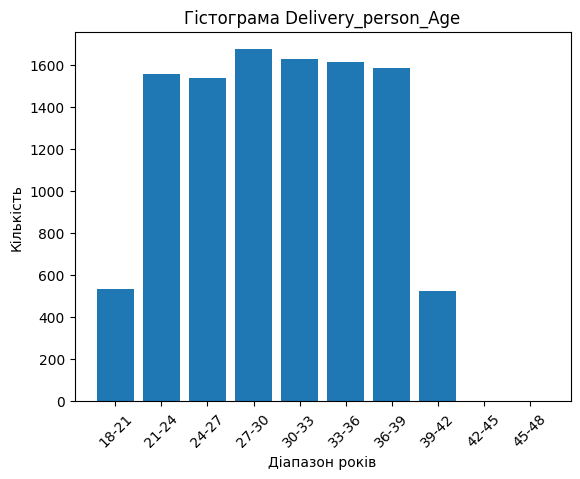

In [268]:
import matplotlib.pyplot as plt

selected_attribute = 'Delivery_person_Age'


min_val = df_set_updated[selected_attribute].min()
max_val = df_set_updated[selected_attribute].max()
# bin_edges = np.linspace(min_val, max_val, 11)
bin_edges = [18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]


hist_values, _ = np.histogram(df_set_updated[selected_attribute], bins=bin_edges)


plt.bar(np.arange(10), hist_values, align='center')
plt.xlabel('Діапазон років')
plt.ylabel('Кількість')
plt.title('Гістограма ' + selected_attribute)
plt.xticks(np.arange(10), [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(10)], rotation=45)
plt.show()



Збудувати графік залежності одного integer/real атрибута від іншого.

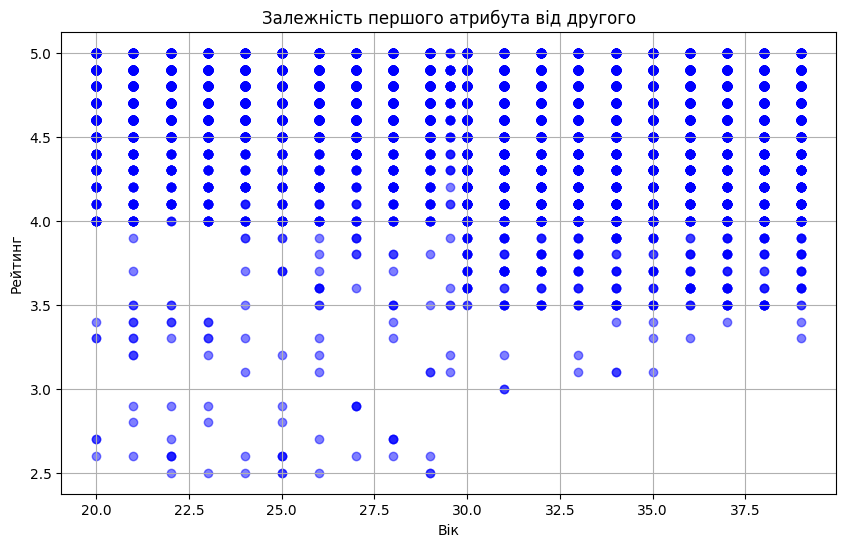

In [269]:
import matplotlib.pyplot as plt


x = df_set_updated['Delivery_person_Age'] 
y = df_set_updated['Delivery_person_Ratings']   

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)  
plt.title('Залежність першого атрибута від другого')
plt.xlabel('Вік')
plt.ylabel('Рейтинг')
plt.grid(True)  
plt.show()


Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [270]:
from scipy.stats import pearsonr, spearmanr

x = df_set_updated['Delivery_person_Age']  
y = df_set_updated['Delivery_person_Ratings']   


pearson_coefficient, _ = pearsonr(x, y)
print(f"Коефіцієнт Пірсона: {pearson_coefficient}")

spearman_coefficient, _ = spearmanr(x, y)
print(f"Коефіцієнт Спірмена: {spearman_coefficient}")


Коефіцієнт Пірсона: -0.09564357634376927
Коефіцієнт Спірмена: -0.08280311438596588


Провести One Hot Encoding категоріального string атрибуту.

In [275]:
from sklearn.preprocessing import OneHotEncoder

unique_values = df_set_updated['Type_of_vehicle'].unique()
print(unique_values)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_set_updated[['Type_of_vehicle']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

res_ind = pd.concat([df_set_updated, encoded_df], axis=1)

new_columns = res_ind.columns[len(df_set_updated.columns):]
print(res_ind[new_columns])

# print(res_ind.columns)





['motorcycle ' 'scooter ' 'electric_scooter ']
       electric_scooter   motorcycle   scooter 
1                    0.0          1.0       0.0
2                    0.0          0.0       1.0
3                    0.0          0.0       1.0
4                    0.0          1.0       0.0
5                    0.0          0.0       1.0
...                  ...          ...       ...
10570                0.0          0.0       1.0
10597                0.0          1.0       0.0
10613                0.0          0.0       1.0
10618                0.0          1.0       0.0
10638                0.0          1.0       0.0

[11355 rows x 3 columns]


Провести візуалізацію багатовимірних даних

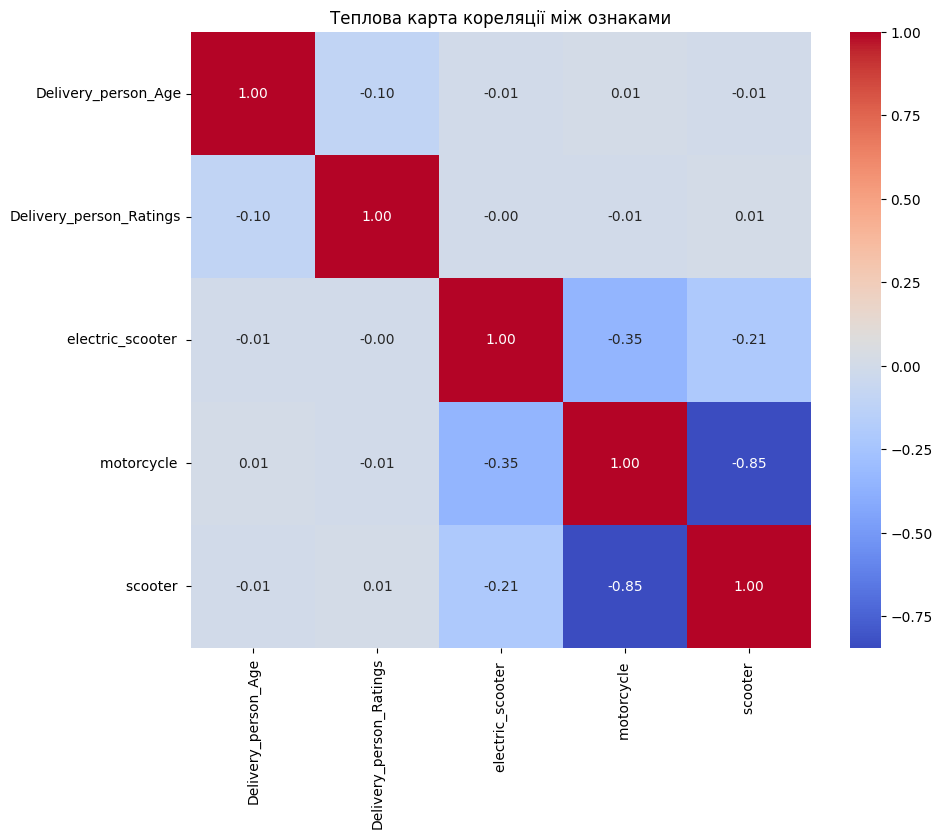

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'electric_scooter ', 'motorcycle ', 'scooter ']
selected_data = res_ind[selected_columns]

plt.figure(figsize=(10, 8))

sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Теплова карта кореляції між ознаками')
plt.show()

